# Analysing IGN Video Game Reviews

We will analyse data on video game reviews from IGN, a popular video game review site. For example, do games like the Witcher 3 get better reviews on the PS4 than the Xbox One? The data was scraped by Eric Grinstein. The list of columns are below:

- score_phrase - how IGN described the game in one word. This is linked to the score it received.
- title - the name of the game.
- url - the URL where you can see the full review.
- platform - the platform the game was reviewed on (PC, PS4, etc).
- score - the score for the game, from 1.0 to 10.0.
- genre - the genre of the game.
- editors_choice - N if the game wasn't an editor's choice, Y if it was. This is tied to score.
- release_year - the year the game was released.
- release_month - the month the game was released.
- release_day - the day the game was released.


## Introduction To The Dataset

In [1]:
import pandas as pd
reviews = pd.read_csv(r"C:\projectdatasets\ign.csv")

# show first 5 rows
reviews.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [5]:
# show how many rows and columns
reviews.shape

(18625, 11)

In [6]:
# show first5 rows, and all columns (same as 'head()' command)
reviews.iloc[0:5,:]

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [2]:
# remove the first column entitled 'Unnamed' by de-selecting it from the data set, and storing the rest back into 'reviews'
# de-selecting involves selecting all rows, and all columns from column 1 onwards (but not column 1 itself)
reviews = reviews.iloc[:,1:]    
reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [17]:
# we will filter data the using indexes and the 'iloc', to select all rows from 10-20, and all columns
some_reviews = reviews.iloc[10:20,:]
some_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
11,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/xbox-360-124581,Xbox 360,7.5,Fighting,N,2012,9,11
12,Good,Wild Blood,/games/wild-blood/iphone-139363,iPhone,7.0,NaN,N,2012,9,10
13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7


In [12]:
# we will select one column using its label, using the 'loc' method - this specifies the first 5 rows and the "score" column
# if you select one column, a 'Series' object will be returned
reviews.loc[:5,"score"] 

0    9.0
1    9.0
2    8.5
3    8.5
4    8.5
5    7.0
Name: score, dtype: float64

In [18]:
# we will select two columns using their labels, using the 'loc' method
reviews.loc[:5,["score", "release_year"]]

,score,release_year
0,9.0,2012
1,9.0,2012
2,8.5,2012
3,8.5,2012
4,8.5,2012
5,7.0,2012


The two ways of selecting records:

- reviews.iloc[:,1] - will retrieve the second column
- reviews.loc[:,"score_phrase"] - will also retrieve the second column.

In [3]:
# can also filter by columns using square brackets (don't need 'iloc' or 'loc' methods):
reviews["score"].head()

0    9.0
1    9.0
2    8.5
3    8.5
4    8.5
Name: score, dtype: float64

In [4]:
# filtering by two columns required two square brackets
reviews[["score", "release_year"]].head()

,score,release_year
0,9.0,2012
1,9.0,2012
2,8.5,2012
3,8.5,2012
4,8.5,2012


In [23]:
# example of creating a 'Series' object, with a list of string row values
s2 = pd.Series(["Boris Yeltsin", "Mikhail Gorbachev"])
print(s2)

0        Boris Yeltsin
1    Mikhail Gorbachev
dtype: object


In [5]:
# example of creating another 'Series' object, with a list of numerical row values
s1 = pd.Series([1,2])
print(s1)

0    1
1    2
dtype: int64


In [25]:
# creating a Dataframe from the above two Series, which places both 'rows' from each Series into a grid
pd.DataFrame([s1,s2])

,0,1
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


In [7]:
# we could create the above Dataframe manually, specifying rows (indexes) and columns names
frame = pd.DataFrame(
    [
        [1,2],
        ["Boris Yeltsin", "Mikhail Gorbachev"]
    ],
    index=["row1", "row2"],
    columns=["column1", "column2"]
)

frame

,column1,column2
row1,1,2
row2,Boris Yeltsin,Mikhail Gorbachev


In [30]:
# we can then filter on the Dataframe using the indexes and column labels we defined:
frame.loc["row1":"row2", "column1"]

row1                1
row2    Boris Yeltsin
Name: column1, dtype: object

In [8]:
# we will select the first five rows of the 'title' column
reviews["title"].head()

0                              LittleBigPlanet PS Vita
1    LittleBigPlanet PS Vita -- Marvel Super Hero E...
2                                 Splice: Tree of Life
3                                               NHL 13
4                                               NHL 13
Name: title, dtype: object


In [34]:
# find the mean of the 'score' column
reviews["score"].mean()

6.950459060402666

In [37]:
# we can find the mean of every numerical column, by running the 'mean' method on the entire Dataframe
reviews.mean()

# or we can write 'reviews.mean(axis=0)'

score               6.950459
release_year     2006.515329
release_month       7.138470
release_day        15.603866
dtype: float64

In [12]:
# we can compute the mean for each row, taking all numerical values for each row, and calculating the mean
reviews.mean(axis=1).head()

0    510.500
1    510.500
2    510.375
3    510.125
4    510.125
dtype: float64

There are other methods we can use to perform data analysis:

- pandas.DataFrame.corr - finds the correlation between columns in a DataFrame
- pandas.DataFrame.count - counts the number of non-null values in each DataFrame column
- pandas.DataFrame.max - finds the highest value in each column
- pandas.DataFrame.min - finds the lowest value in each column
- pandas.DataFrame.median - finds the median of each column
- pandas.DataFrame.std - finds the standard deviation of each column

We can use the 'corr' method to see if any columns (such as 'release_year', 'release_month' or 'release_day' correlate with 'score') 

This can tell us if games released more recently, based on 'release_year', have been getting higher reviews, or if games released towards the end of the year score better, based on 'release_month'

In [40]:
reviews.corr()

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


We can see that none of our numeric columns correlate with score, meaning that release timing doesn't relate to review scores.

In [17]:
# we can perform some DataFrame maths i.e. divide each score for the first five rows by 2
(reviews["score"] / 2).head()

0    4.50
1    4.50
2    4.25
3    4.25
4    4.25
Name: score, dtype: float64

In [24]:
# we can use 'Boolean Indexing' to return 'True' or 'False' values based on an evaluation criteria
# the following will return a series of 'True' or 'False' values if a review score is higher than 7
score_filter = reviews["score"] > 7

# show the first 10 rows, with 'True' or 'False' scores
print(score_filter.head(10))

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7     True
8    False
9    False
Name: score, dtype: bool


In [44]:
# with Boolean Series, can use it to select only certain rows where the value is 'True' (i.e. score is higher than 7)
filtered_reviews = reviews[score_filter]
filtered_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [45]:
# we can perform multiple filtering i.e. select rows where score is higher than 7 and platform is Xbox One
# this will return a Boolean Series of 'True' or 'False' results
xbox_one_filter = (reviews["score"] > 7) & (reviews["platform"] == "Xbox One")

# now use the Boolean Series to select only  rows where the value is 'True' (i.e. score is > than 7, and platform is Xbox One)
filtered_reviews = reviews[xbox_one_filter]
filtered_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
17137,Amazing,Gone Home,/games/gone-home/xbox-one-20014361,Xbox One,9.5,Simulation,Y,2013,8,15
17197,Amazing,Rayman Legends,/games/rayman-legends/xbox-one-20008449,Xbox One,9.5,Platformer,Y,2013,8,26
17295,Amazing,LEGO Marvel Super Heroes,/games/lego-marvel-super-heroes/xbox-one-20000826,Xbox One,9.0,Action,Y,2013,10,22
17313,Great,Dead Rising 3,/games/dead-rising-3/xbox-one-124306,Xbox One,8.3,Action,N,2013,11,18
17317,Great,Killer Instinct,/games/killer-instinct-2013/xbox-one-20000538,Xbox One,8.4,Fighting,N,2013,11,18


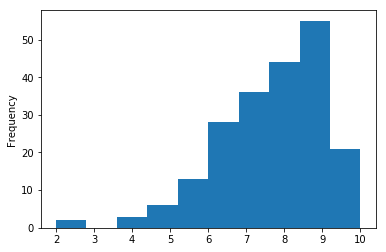

In [49]:
# we can import some graphical libraries to draw plots
%matplotlib inline

# create histogram showing distribution of 'score' values, for all rows where the platform is an Xbox One
reviews[reviews["platform"] == "Xbox One"]["score"].plot(kind="hist")

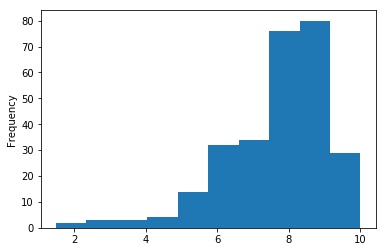

In [50]:
# create histogram showing distribution of 'score' values, for all rows where the platform is an Playstation 4
reviews[reviews["platform"] == "PlayStation 4"]["score"].plot(kind="hist")

We can see that the PlayStation 4 has more highly rated games than the Xbox One

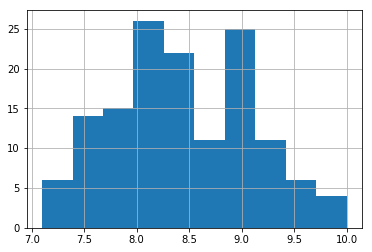

In [51]:
# create a histogram showing the distribution of 'score' values, for the all rows where the platform is an Xbox One and 
# where the score value is higher than 7 (based on the filtered Dataframe 'filtered_reviews' created above)
filtered_reviews["score"].hist()